<a href="https://colab.research.google.com/github/Kishankumar1328/Machine_Learning/blob/main/Car_Price_prediction_by_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv("/content/CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df.shape

(205, 26)

In [4]:
df.isnull()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
df.sample()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
151,152,1,toyota corona,gas,std,two,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,31,38,6338.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.dropna()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [14]:
x=np.asanyarray(df[["wheelbase","enginesize","horsepower","peakrpm","citympg","highwaympg"]])
y=np.asanyarray(df[["price"]])

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [16]:
x_train

array([[  99.4,  136. ,  115. , 5500. ,   18. ,   22. ],
       [ 115.6,  234. ,  155. , 4750. ,   16. ,   18. ],
       [  99.1,  121. ,  110. , 5250. ,   21. ,   28. ],
       [  97. ,  108. ,  111. , 4800. ,   24. ,   29. ],
       [  93.7,   98. ,   68. , 5500. ,   31. ,   38. ],
       [  93.7,   90. ,   68. , 5500. ,   31. ,   38. ],
       [  95.9,  156. ,  145. , 5000. ,   19. ,   24. ],
       [  96.9,  108. ,  111. , 4800. ,   23. ,   23. ],
       [  97.3,  109. ,   85. , 5250. ,   27. ,   34. ],
       [ 105.8,  131. ,  140. , 5500. ,   17. ,   20. ],
       [  94.5,  103. ,   55. , 4800. ,   45. ,   50. ],
       [  94.5,   98. ,   70. , 4800. ,   29. ,   34. ],
       [  98.8,  122. ,   84. , 4800. ,   26. ,   32. ],
       [ 102.7,  140. ,  175. , 5000. ,   19. ,   24. ],
       [  99.2,  181. ,  160. , 5200. ,   19. ,   25. ],
       [  98.8,  122. ,   64. , 4650. ,   36. ,   42. ],
       [ 104.3,  130. ,  162. , 5100. ,   17. ,   22. ],
       [  97.2,  108. ,   94. ,

In [17]:
x_test

array([[  93.1,   91. ,   68. , 5000. ,   31. ,   38. ],
       [ 104.5,  161. ,  156. , 5200. ,   19. ,   24. ],
       [  99.8,  136. ,  110. , 5500. ,   19. ,   25. ],
       [  88.4,   61. ,   48. , 5100. ,   47. ,   53. ],
       [  97.3,  109. ,  100. , 5500. ,   26. ,   32. ],
       [  98.4,  146. ,  116. , 4800. ,   24. ,   30. ],
       [  93.7,   92. ,   68. , 5500. ,   37. ,   41. ],
       [  95.7,   92. ,   62. , 4800. ,   27. ,   32. ],
       [  91.3,  181. ,  160. , 5200. ,   19. ,   25. ],
       [  93.7,   92. ,   76. , 6000. ,   30. ,   34. ],
       [ 101.2,  164. ,  121. , 4250. ,   21. ,   28. ],
       [  98.4,  203. ,  288. , 5750. ,   17. ,   28. ],
       [  95.3,   70. ,  101. , 6000. ,   17. ,   23. ],
       [ 104.9,  134. ,   72. , 4200. ,   31. ,   39. ],
       [  94.5,   90. ,   70. , 5400. ,   38. ,   43. ],
       [  98.4,  146. ,  116. , 4800. ,   24. ,   30. ],
       [  96.1,  132. ,   90. , 5100. ,   23. ,   31. ],
       [ 105.8,  136. ,  110. ,

In [18]:
y_train

array([[17450.   ],
       [34184.   ],
       [15040.   ],
       [11259.   ],
       [ 7609.   ],
       [ 7609.   ],
       [14869.   ],
       [11694.   ],
       [ 8495.   ],
       [23875.   ],
       [ 7099.   ],
       [ 8058.   ],
       [10595.   ],
       [16503.   ],
       [18399.   ],
       [10795.   ],
       [18420.   ],
       [ 9960.   ],
       [ 6229.   ],
       [ 6479.   ],
       [15510.   ],
       [10295.   ],
       [ 8495.   ],
       [11845.   ],
       [13499.   ],
       [ 8189.   ],
       [ 6295.   ],
       [ 8778.   ],
       [ 7999.   ],
       [ 7395.   ],
       [ 7995.   ],
       [ 6095.   ],
       [ 7053.   ],
       [ 7126.   ],
       [16900.   ],
       [ 7499.   ],
       [11900.   ],
       [ 7463.   ],
       [13860.   ],
       [16558.   ],
       [24565.   ],
       [ 8558.   ],
       [13200.   ],
       [ 8195.   ],
       [32528.   ],
       [11048.   ],
       [13295.   ],
       [16845.   ],
       [ 9258.   ],
       [10245.   ],


In [19]:
y_test

array([[ 6795. ],
       [15750. ],
       [15250. ],
       [ 5151. ],
       [ 9995. ],
       [11199. ],
       [ 5389. ],
       [ 7898. ],
       [17199. ],
       [ 6529. ],
       [20970. ],
       [31400.5],
       [10945. ],
       [18344. ],
       [ 8916.5],
       [ 9989. ],
       [ 9295. ],
       [18920. ],
       [ 7895. ],
       [ 6488. ],
       [ 9959. ],
       [15580. ],
       [ 9895. ],
       [11549. ],
       [15998. ],
       [ 5118. ],
       [ 6938. ],
       [16695. ],
       [ 8358. ],
       [ 5499. ],
       [ 7975. ],
       [12290. ],
       [22018. ],
       [ 8948. ],
       [ 6849. ],
       [41315. ],
       [11595. ],
       [18150. ],
       [ 6377. ],
       [45400. ],
       [ 8916.5]])

In [21]:
lm=LinearRegression()

In [28]:
lm.fit(x_test,y_test)

LinearRegression()

In [58]:
x1=lm.coef_

In [59]:
y1=lm.intercept_

In [35]:
y_predict=lm.predict(x_test)

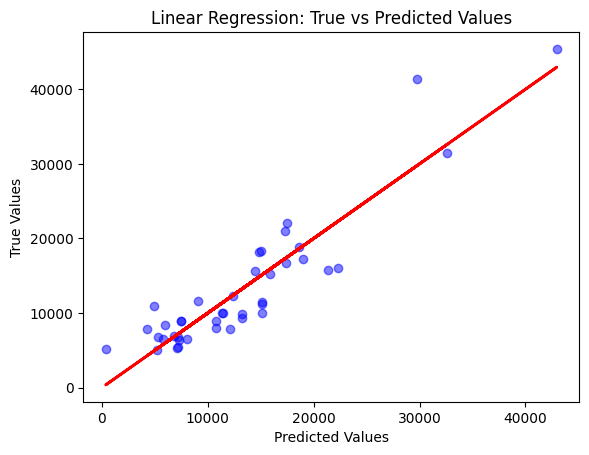

In [43]:
plt.scatter(y_predict, y_test, color='blue', alpha=0.5)
plt.plot(y_predict, y_predict, color='red', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Linear Regression: True vs Predicted Values')
plt.show()


In [54]:

print("Mean Absolute Error: %.2f" % np.mean(np.absolute(y_predict- y_test)))
print("Mean Square Error: %.2f" % np.mean((y_predict- y_test) ** 2))
print("R2_score:%.2f"%r2_score(y_test,y_predict))


Mean Absolute Error: 0.00
Mean Square Error: 0.00
R2_score:1.00


In [90]:
lm2 = LinearRegression()
x2 = df[["wheelbase", "enginesize", "horsepower", "peakrpm", "citympg", "highwaympg"]]
y2 = df["price"]
lm2.fit(x2, y2)
price = lm2.predict(x2)
print(price)


[11178.40087141 11178.40087141 17487.0810897  12037.7512162
 15464.97966768 15425.80140492 16980.62111749 16980.62111749
 17843.52326186 17456.37670235 12679.10660312 12679.10660312
 17675.94798647 17675.94798647 18147.49471781 28132.94507281
 28132.94507281 29753.00160738   397.55323155  6705.3404417
  6705.3404417   6475.65947908  6630.89459479  9242.39500617
  6630.89459479  6630.89459479  6630.89459479  9242.39500617
 12887.35170422 17690.14065447  3390.35113277  6183.94566344
  4837.55148311  7839.2121604   7839.2121604   8564.79469293
  8564.79469293 10896.88573602 10896.88573602 10896.88573602
 10896.88573602 11565.92848456 11190.29595417  8448.00253
  6705.3404417   6705.3404417  10711.17777031 34592.38773411
 34592.38773411 44211.83835813  5476.42146877  5841.43297834
  5841.43297834  5841.43297834  5841.43297834  7226.81782035
  7226.81782035  7226.81782035 10204.60365378 11218.02760281
 11218.02760281 11218.02760281 11218.02760281  9967.46085296
 11218.02760281 17099.5521017